# Implementación de arboles de decisión

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
%matplotlib inline

In [2]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
model = DecisionTreeClassifier().fit(X_train,y_train)
#criterion="entropy"
#model = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.1).fit(X_train,y_train)
#model = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train), le decimos cuanta profundidad tenga

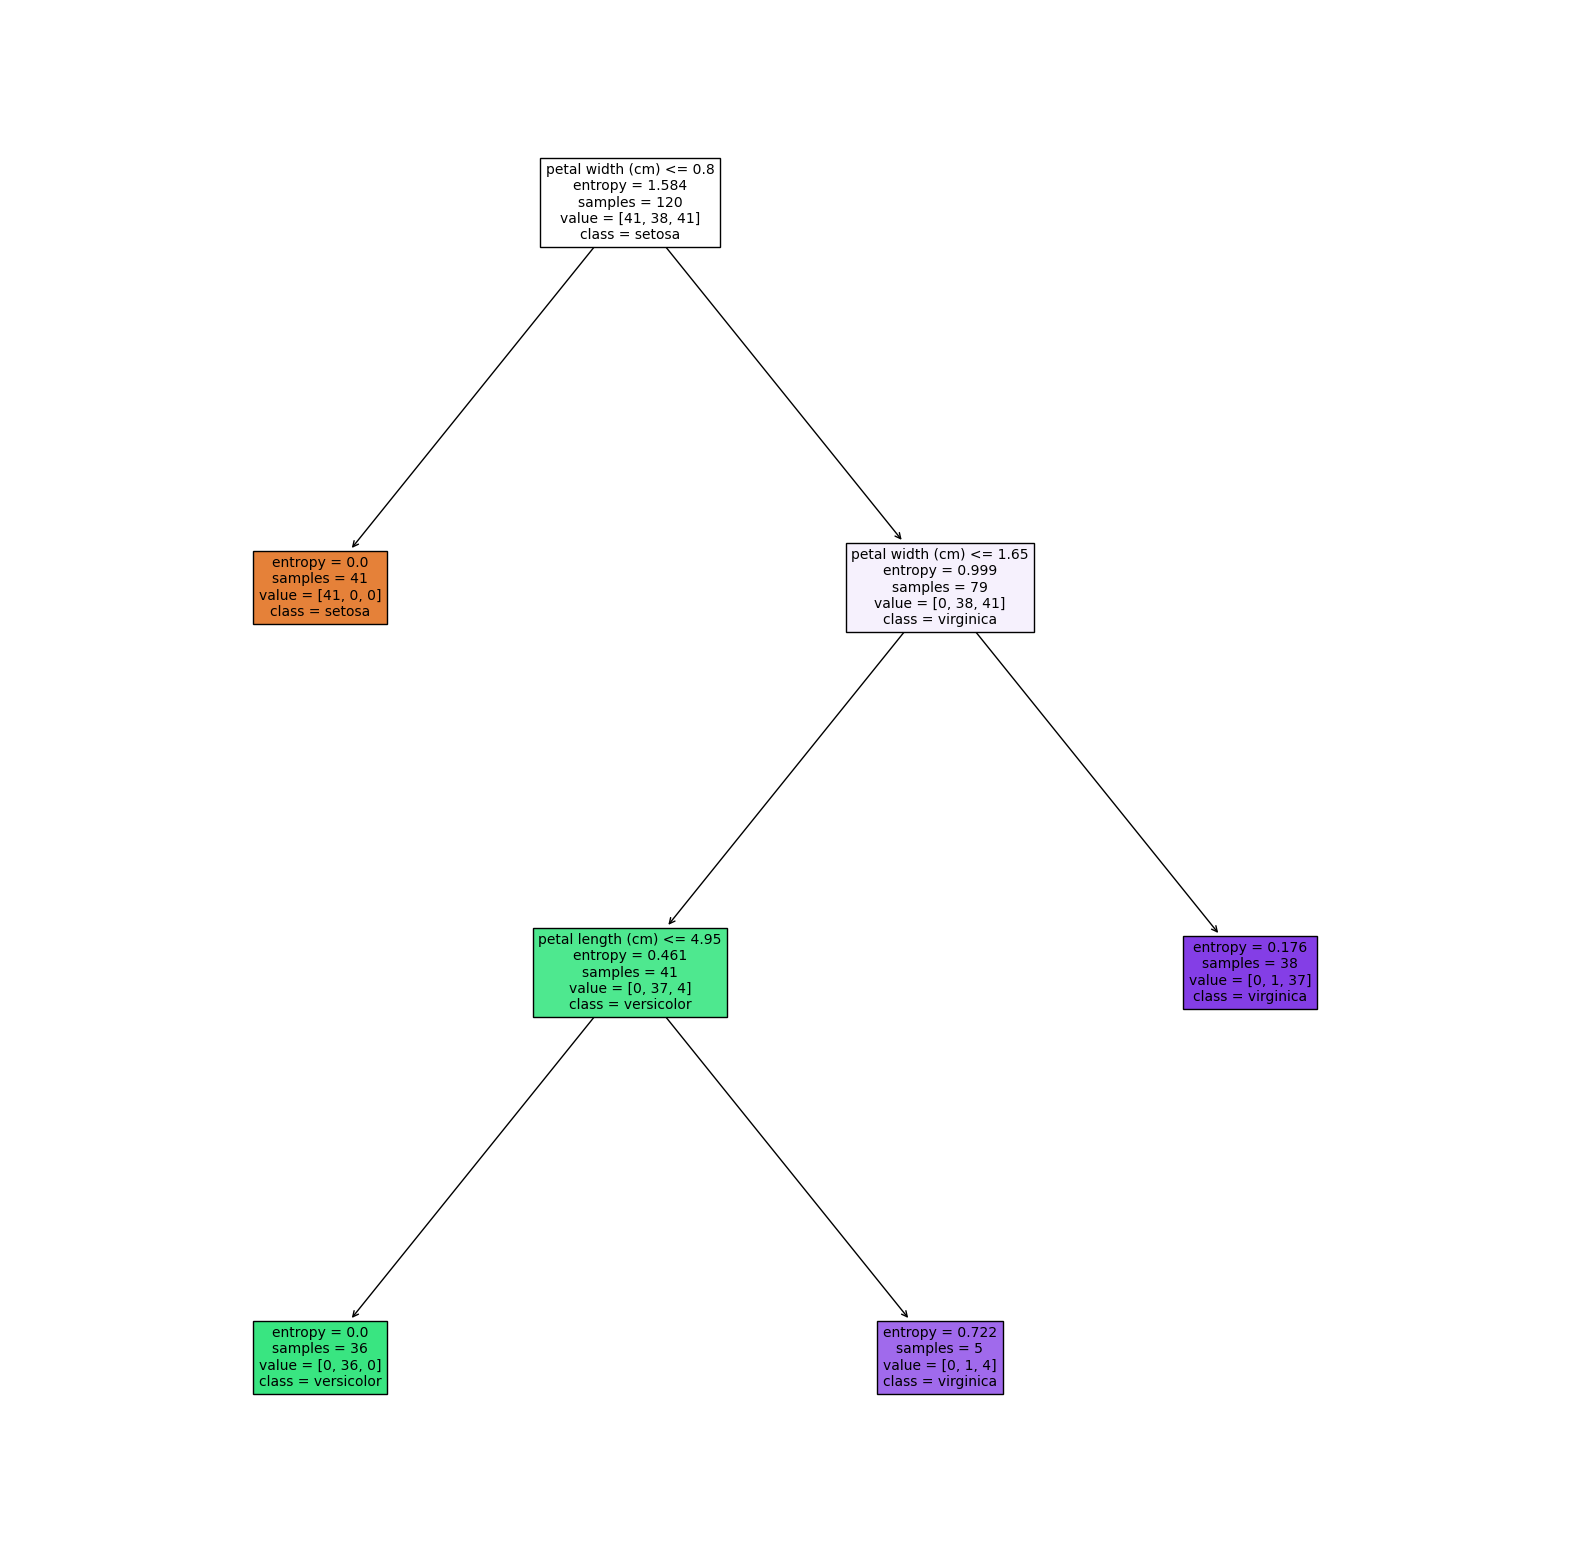

In [25]:
plt.figure(figsize=(20,20))
tree.plot_tree(model,feature_names=iris.feature_names,class_names=iris.target_names, filled=True,fontsize=10)
plt.show()

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test,y_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        12
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [29]:
from sklearn.model_selection import GridSearchCV, KFold

In [31]:
parametros = {
    "ccp_alpha":[0,0.01,0.1],
    "max_depth":[None,2,3,4,5,10]
}

cv = KFold(n_splits=5, shuffle=True,random_state=42)
pc_grid = GridSearchCV(model,parametros, cv = cv, scoring="accuracy")
pc_grid.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(ccp_alpha=0.1,
                                              criterion='entropy'),
             param_grid={'ccp_alpha': [0, 0.01, 0.1],
                         'max_depth': [None, 2, 3, 4, 5, 10]},
             scoring='accuracy')

In [32]:
pc_grid.best_params_

{'ccp_alpha': 0, 'max_depth': 3}